In [1]:
%matplotlib inline
import plotting_Boyle as plt_B
reload(plt_B)
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
import sys 
sys.path.append('../code_general/')
from read_model_ID import unpack_parameters
import CRISPR_free_energy_landscape as FreeEnergy
reload(FreeEnergy);
import plotting_Boyle as plt_B
reload(plt_B)
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);

E, H, L, M, O (interesting)

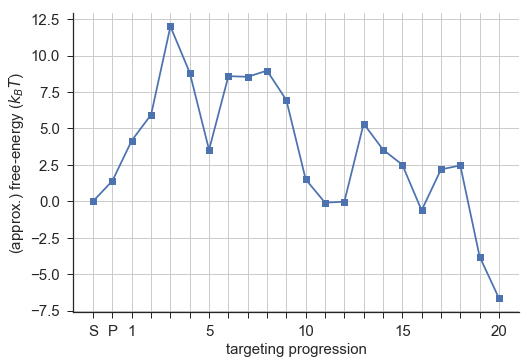

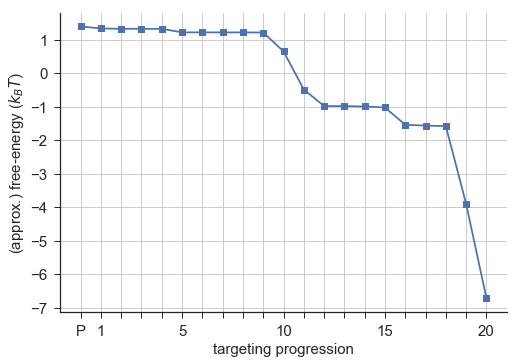

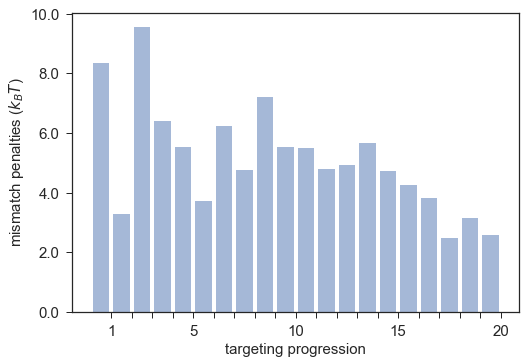

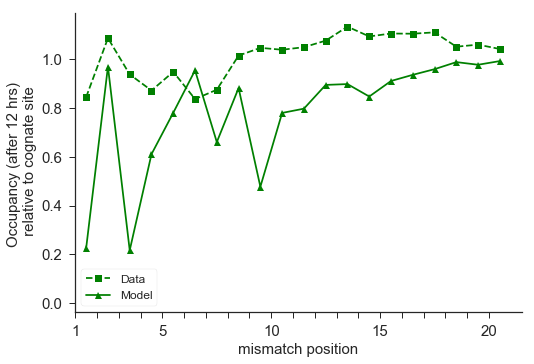

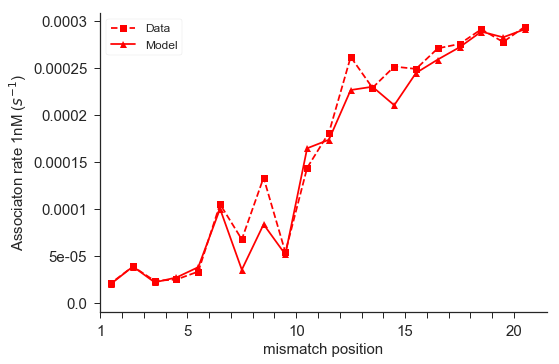

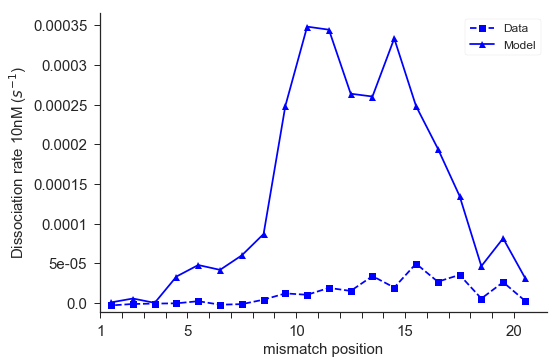

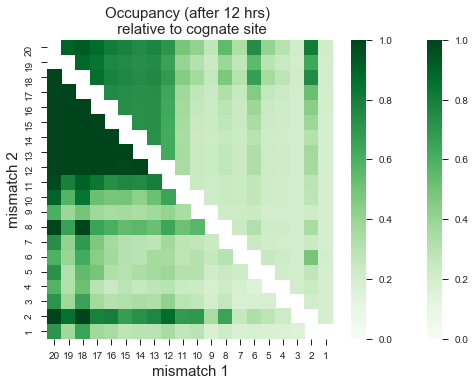

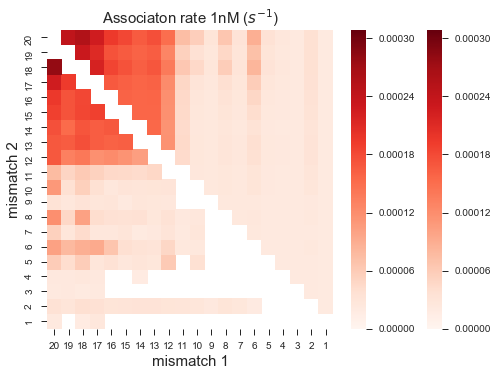

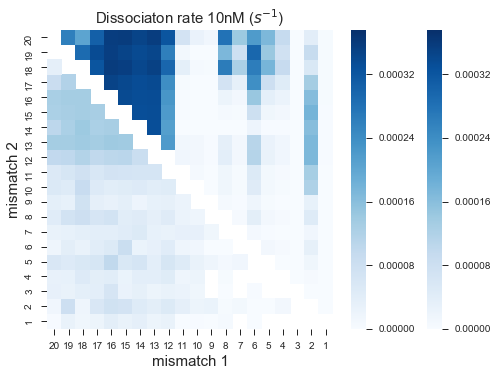

In [6]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_general_energies_v2'
filename = '../data/25_10_2018/fit_25_10_2018_sim_40.txt'
Nparams = 44
parameters = plt_B.load_simm_anneal(filename, Nparams)

# parameters[:21] = 0.0


Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)

# Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id)
# plt.savefig('../reports/fig32_10_10_2018.pdf',format='pdf',bbox_inches='tight');
Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id);
# plt.savefig('../reports/fig40_10_10_2018.pdf',format='pdf',bbox_inches='tight');


plt.figure()
FreeEnergy.plot_mismatch_penalties(parameters, model_id)
# plt.savefig('../reports/fig33_10_10_2018.pdf',format='pdf',bbox_inches='tight');



plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
# plt.savefig('../reports/fig34_10_10_2018.pdf',format='pdf',bbox_inches='tight');


plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
# plt.savefig('../reports/fig35_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')
# plt.savefig('../reports/fig36_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
# plt.savefig('../reports/fig37_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
# plt.savefig('../reports/fig38_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')
# plt.savefig('../reports/fig39_10_10_2018.pdf',format='pdf',bbox_inches='tight');

In [3]:
parameters 

array([ 1.40693677, -2.85521343, -1.91164152, -5.06746149,  4.72738662,
       -1.94375661, -0.33934631,  4.96636808,  0.10205145, -4.74872045,
        6.93745889,  1.60551905,  0.09016542, -6.30111836,  5.91197938,
       -4.62817592,  4.72555339,  4.03745939, -4.38542631,  1.1622616 ,
        7.37392321,  8.98991479,  3.61698802,  6.38370049,  6.8824078 ,
        5.55615205,  3.87699216,  6.55582313,  4.98163747,  6.19084699,
        5.82257478,  5.68483032,  4.63875073,  4.67070195,  5.85070513,
        5.51401206,  5.22402633,  4.46251198,  5.42361258,  9.73782454,
        3.70317146, -2.16612566, -0.68066705,  2.90134702])

# Compare to Ilya's data 

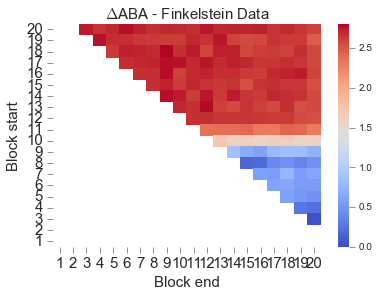

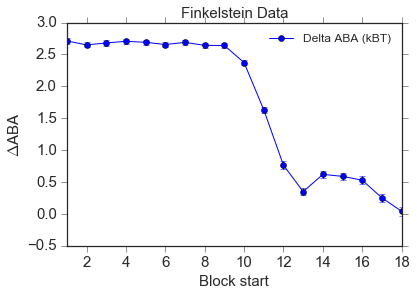

In [9]:
sys.path.append('../code_ABA_Finkelsteinlab/')
import plotting_ABA as pltABA
reload(pltABA);


IlyaData = pd.read_csv('../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv')

BlockMismatches, _,ABA_first_mm_pos = pltABA.plot_block_mm_ABA(IlyaData, 
                                                               SaveFigures=True,
                                                               figure_names=['../reports/fig41_10_10_2018.pdf',
                                                                            '../reports/fig42_10_10_2018.pdf']);

In [7]:
ABA_landscape = ABA_first_mm_pos['Delta ABA (kBT)'] - ABA_first_mm_pos['Delta ABA (kBT)'][0]
FreeEnergy_landscape_shifted = FreeEnergy_landscape - FreeEnergy_landscape[0]


plt.plot(range(1,len(FreeEnergy_landscape_shifted)+1),FreeEnergy_landscape_shifted,
        marker='o',
        markersize=8,
        markerfacecolor='white',
        markeredgewidth=2,
        linestyle='dashed',
        label='prediction using association data Greenleaf lab.')
plt.errorbar(range(1,len(ABA_landscape)+1),ABA_landscape,
        yerr=np.array(ABA_first_mm_pos['Uncertainty']),
        elinewidth=10,
        capsize=10,
        marker='o',
        markersize=8,
        markerfacecolor='white',
        markeredgewidth=2,
        linestyle='dashed',
        label='data Finkelstein lab.')
plt.xlim(0,19);
# plt.ylim(-4.0,0.0);
plt.xticks(range(1,19),fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('(aparent) free-energy',fontsize=15)
plt.legend(loc='best',frameon=True,fontsize=15);
sns.despine();
# plt.savefig('../reports/fig42_10_10_2018.pdf',format='pdf',bbox_inches='tight');

NameError: name 'ABA_first_mm_pos' is not defined

In [36]:
ABA_first_mm_pos['Uncertainty']


0     0.041721
1     0.038479
2     0.043757
3     0.035940
4     0.037656
5     0.043135
6     0.044230
7     0.039291
8     0.038827
9     0.043926
10    0.050287
11    0.057941
12    0.057921
13    0.059457
14    0.050330
15    0.061867
16    0.063721
17    0.068695
Name: Uncertainty, dtype: float64

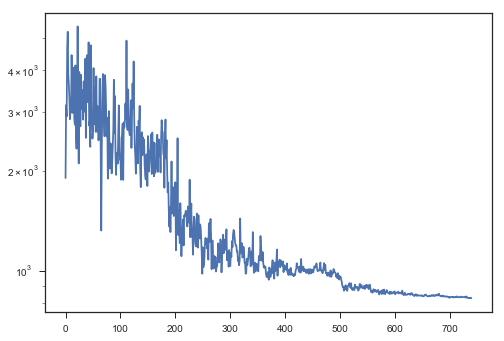

In [20]:
fit = pd.read_csv(filename, delimiter='\t', index_col=Nparams+2)
fit = fit.reset_index()
plt.semilogy(fit.Potential)

In [19]:
rate_sol_to_PAM = 10**parameters[-3]
rate_PAM_to_R1  = 10**parameters[-2]
rate_internal = 10**parameters[-1]


rate_PAM_to_sol = rate_sol_to_PAM * np.exp(parameters[0])



print rate_sol_to_PAM , rate_PAM_to_sol 
print rate_PAM_to_R1
print rate_internal


0.674063091656 2.55729501317
0.170113460779
790.655331483


In [13]:
def get_pos(s):
    if s == 'WT':
        return([])
    s2 = s.split(':')
    return map(lambda x: 20-int(x[:-1]), s2)

def find_PAM_mutations(x):
    return (np.array(x)<=0).any()

def string_get_pos(x):
    s = ''
    for pos in x:
        s += str(pos) + 'X:'
    if len(x)==0:
        s='WT:'
    return s[:-1]

def get_pos_again(s):
    if s == 'WT':
        return([])
    s2 = s.split(':')
    return np.array(map(lambda x: int(x[:-1]), s2)).astype('int')

def remove_NaN(x):
    return np.array(x)[np.where(np.isnan(x)==False)[0]]

In [14]:
replica = '1'
path = '../Data_Boyle/'

occ = pd.read_csv(path + 'occupancy_rep' + str(replica) + '_processed_with_errors.txt')
kon = pd.read_csv(path + 'second_fit_data.summarized.on.1nM.rep' + str(replica) + '.txt', delimiter='\t')
koff = pd.read_csv(path + 'second_fit_data.summarized.off.10nM.rep' + str(replica) + '.txt', delimiter='\t')
kon = kon[['mutations', 'slope', 'se']]
koff = koff[['mutations', 'slope', 'se']]
occ = occ[['mutations', 'Ratio', 'rel_err_Ratio']]
kon.rename(columns={'slope': 'on_slope'}, inplace=True)
koff.rename(columns={'slope': 'off_slope'}, inplace=True)
occ.rename(columns={'Ratio': 'occ'}, inplace=True)
kon.rename(columns={'se': 'on_error'}, inplace=True)
koff.rename(columns={'se': 'off_error'}, inplace=True)
occ.rename(columns={'rel_err_Ratio': 'occ_error'}, inplace=True)
koff['off_slope'] *= -1
Full_data = kon.copy()
Full_data = Full_data.merge(koff, how='outer', on='mutations')
Full_data = Full_data.merge(occ, how='outer', on='mutations')
Full_data['MM_pos'] = Full_data['mutations'].apply(get_pos)
Full_data['PAM_mut'] = Full_data['MM_pos'].apply(find_PAM_mutations)
Full_data['mm_ID'] = Full_data['MM_pos'].apply(string_get_pos)
no_PAM = Full_data[Full_data.PAM_mut == False]
Combined_Data = no_PAM[['mm_ID', 'occ', 'on_slope', 'off_slope', 'on_error', 'off_error', 'occ_error']]
Combined_Data = Combined_Data.groupby('mm_ID').agg(lambda x: list(x))
Combined_Data = Combined_Data.reset_index()
Combined_Data['MM_pos'] = Combined_Data['mm_ID'].apply(get_pos_again)
Combined_Data = Combined_Data[['MM_pos', 'occ', 'on_slope', 'off_slope', 'on_error', 'off_error', 'occ_error']]
Combined_Data['occ'] = Combined_Data['occ'].apply(remove_NaN)
Combined_Data['on_slope'] = Combined_Data['on_slope'].apply(remove_NaN)
Combined_Data['off_slope'] = Combined_Data['off_slope'].apply(remove_NaN)
Combined_Data['occ_error'] = Combined_Data['occ_error'].apply(remove_NaN)
Combined_Data['on_error'] = Combined_Data['on_error'].apply(remove_NaN)
Combined_Data['off_error'] = Combined_Data['off_error'].apply(remove_NaN)

In [15]:
prediction = Combined_Data['MM_pos'].apply(lambda x: dCas9.calc_Boyle(CalcOccupancy = True, 
                              CalcOffRate = True, 
                              CalcOnRate = True, 
                              parameters = parameters, 
                              mismatch_positions = x, 
                              guide_length=20, 
                              model_id=model_id)                                          
                                          )




In [16]:
def split_occ(row):
    occ  = row[0]
    return occ 

def split_asso(row):
    asso = row[1]
    return asso

def split_disso(row):
    disso = row[2]
    return disso 

Combined_Data['theory_occ'] = prediction.apply(split_occ)
Combined_Data['theory_on'] = prediction.apply(split_asso)
Combined_Data['theory_off'] = prediction.apply(split_disso)

/Users/mklein1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


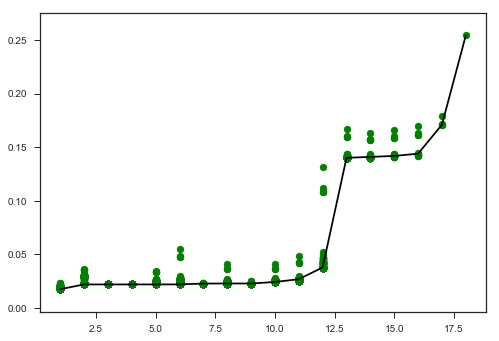

In [17]:
def get_first_mm_pos(x):
    return min(x)




MultipleMM = Combined_Data[Combined_Data['MM_pos'].apply(len)>2]
first_mm_pos = MultipleMM['MM_pos'].apply(get_first_mm_pos)
MultipleMM['first_mm_pos'] = first_mm_pos







plt.scatter(MultipleMM['first_mm_pos'], MultipleMM['theory_on']*1000, color = 'g')

plt.plot(range(1,19), MultipleMM.groupby('first_mm_pos')['theory_on'].median()*1000, color='black')
# plt.savefig('../reports/fig31_10_10_2018.pdf',format='pdf',bbox_inches='tight');

In [18]:
def find_mut_pos(mutation):
    mut_list = mutation.split(':')
    return np.array(map(lambda x: 20-int(x[:-1]), mut_list))

def extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color, show_plot=True):
    data = Boyle_data.copy()
    data= data[data['seq'].apply(lambda x: x[-2:]=='GG')]
    data = data[data['nmut']>0]
    data.drop(['p5', 'p95', 'seq', 'series', 'count', 'se', 'nmut'], axis=1, inplace=True)
    data['MM_pos'] = data['mutations'].apply(find_mut_pos)
    data['MM_pos'] = data['MM_pos'].apply(lambda x: list(x[x>0]))
    data['nmut'] = data['MM_pos'].apply(len)        
    data = data[(data['nmut']>=nmut_min)&(data['nmut']<=nmut_max)]
    data['1st_MM_pos'] = data['MM_pos'].apply(lambda x: x[-1])
    data['MM_dist'] = data['MM_pos'].apply(lambda x: np.abs(np.diff(np.array(x))))
    if consecuitive:
        data = data[data['MM_dist'].apply(lambda x: np.all(x==1))]
    data.drop(['MM_pos','mutations','nmut','MM_dist'], axis=1, inplace=True)
    data.sort_values(by='1st_MM_pos',inplace=True)
    data.reset_index(inplace=True,drop=True)
    data = data[['1st_MM_pos', col_name]]
    data_med = data.groupby('1st_MM_pos').median()
    data_med.reset_index(inplace=True)
    
    if show_plot:
        plt.plot(data['1st_MM_pos'], data[col_name], 'o', color=color)
        plt.plot(data_med['1st_MM_pos'], data_med[col_name], 'o-',color='k')
        plt.xlabel('1st mismatch position', fontsize=15)
        plt.ylabel(col_name, fontsize=15)
        plt.xticks(range(1,21),fontsize=15);
        plt.yticks(fontsize=15);
        title = 'nmut_min = '+str(nmut_min)+'   '+'nmut_max = '+str(nmut_max)
        if consecuitive:
            title = title + '   consecuitive'
        plt.title(title, fontsize=15)
    
    return data_med, data

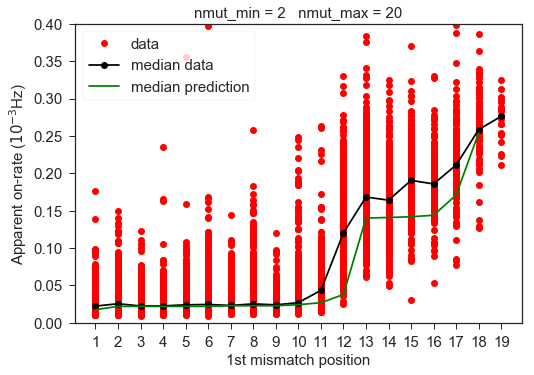

In [20]:
on_data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.on.1nM.rep1.txt',delimiter='\t')
on_data['slope'] = 1000*on_data['slope']
on_data['se'] = 1000*on_data['se']
on_data.rename(columns={'slope': 'Apparent on-rate ($10^{-3}$Hz)'}, inplace=True)

Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 20
consecuitive = False
color = 'r'
on_data_med_1MM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)




plt.plot(MultipleMM.groupby('first_mm_pos')['theory_on'].median()*1000, color='green')
plt.ylim(0,0.4);


plt.legend(['data','median data','median prediction'],frameon=True,fontsize=15)
# plt.savefig('../reports/fig31_10_10_2018.pdf',format='pdf',bbox_inches='tight');


In [15]:
dCas9.calc_Boyle(CalcOccupancy = True, 
                              CalcOffRate = True, 
                              CalcOnRate = True, 
                              parameters = parameters, 
                              mismatch_positions = [13], 
                              guide_length=20, 
                              model_id=model_id)

(2.5787297319810971, 0.00023278291364633015, 0.0002206115731256687)

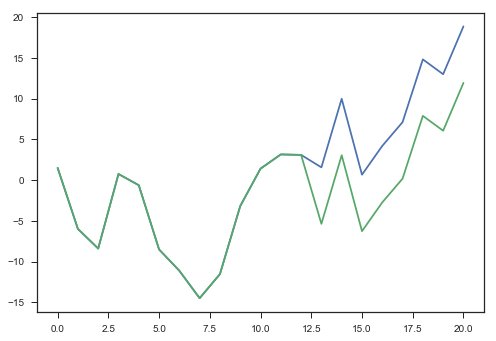

In [13]:
epsilon, rates = unpack_parameters(parameters,model_id)
plt.plot(np.cumsum(dCas9.get_energies(epsilon,mismatch_positions=[13], guide_length=20)))


epsilon, rates = unpack_parameters(parameters,model_id)
plt.plot(np.cumsum(dCas9.get_energies(epsilon,mismatch_positions=[], guide_length=20)))


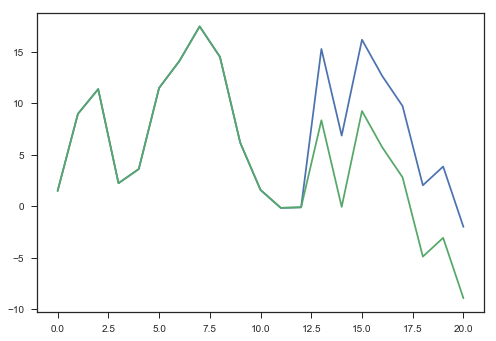

In [19]:

epsilon, rates = unpack_parameters(parameters,model_id)
plt.plot(np.cumsum(dCas9.get_energies(epsilon,mismatch_positions=[13], guide_length=20)))


epsilon, rates = unpack_parameters(parameters,model_id)
plt.plot(np.cumsum(dCas9.get_energies(epsilon,mismatch_positions=[], guide_length=20)))


In [41]:
from scipy import linalg
m = dCas9.get_master_equation(parameters, mismatch_positions=[13], model_id=model_id,guide_length=20)
everything_unbound = np.array([1.0] + [0.0] * (20 + 1))
np.sum(linalg.expm(m*1500).dot(everything_unbound))

1.0131089773353792

In [20]:
np.exp(10**9)

/Users/mklein1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


inf

[0.0,
 1.0873027790899998,
 8.1411265218400004,
 3.8907203748599999,
 3.5347625668560001,
 2.2059963939660001,
 2.3733591467580002,
 4.1198590901180001,
 2.9467999758880001,
 3.8695663337130002,
 3.2779178765950001,
 3.0255890432779999,
 -2.5916248046219996,
 4.9350675420080004,
 2.3239600319380003,
 2.7910351810220004,
 4.3485589974420007,
 -1.6407771548979992,
 -1.3404119920299993,
 -5.4024557788499985,
 -0.81868225641999803,
 -10.395325272089998]

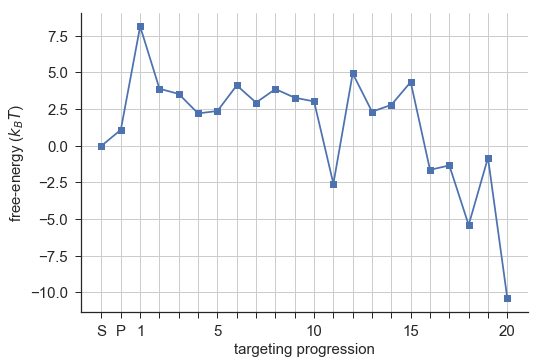

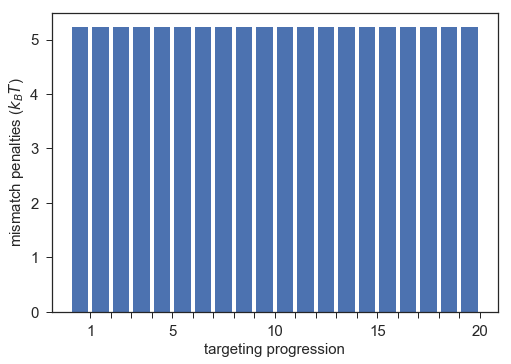

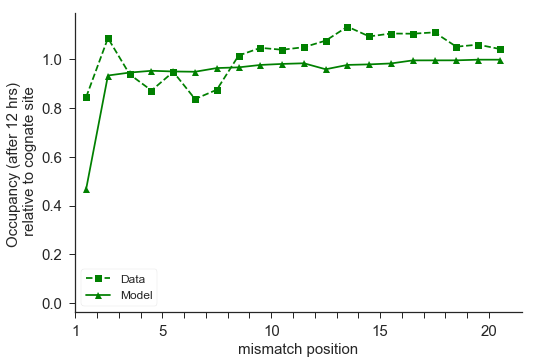

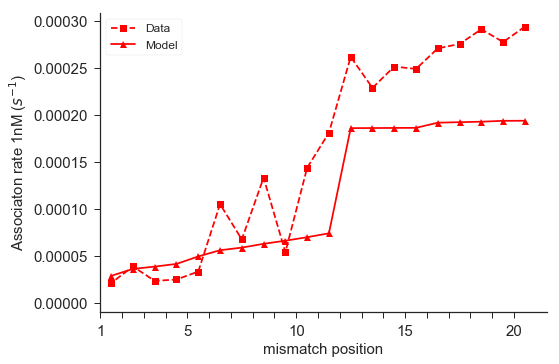

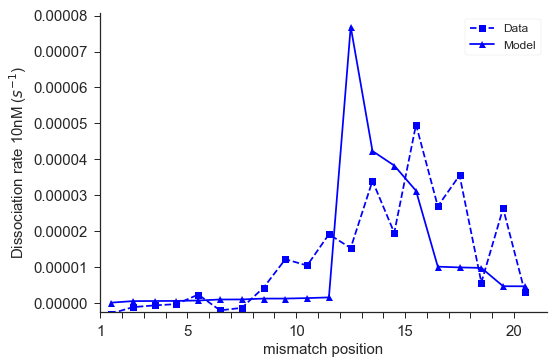

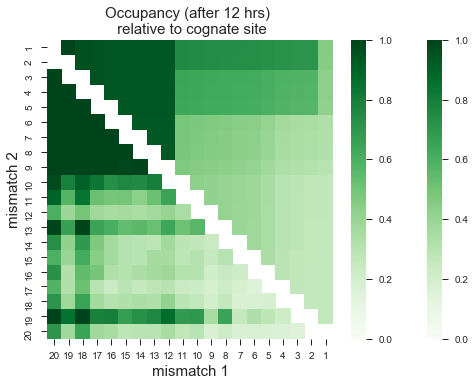

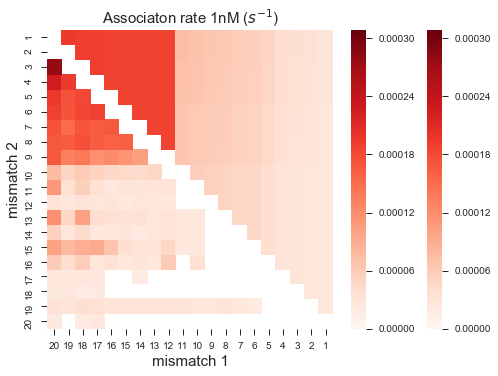

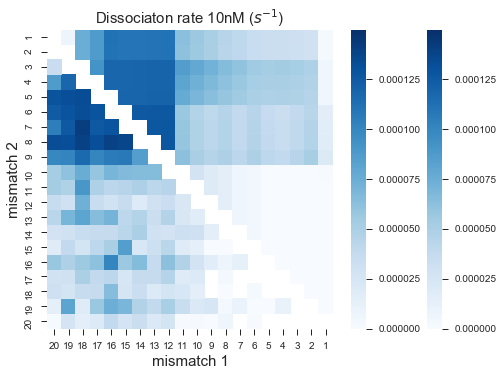

In [41]:
reload(plt_B)

model_id = 'constant_eps_I'
filename = '../data/26_7_2018/fit_26_7_2018_sim_T.txt'
Nparams = 24
parameters = plt_B.load_simm_anneal(filename, Nparams)

Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)

Energy_landscape = plt_B.plot_landscape(parameters, model_id)
plt.figure()
plt_B.plot_mismatch_penalties(parameters, model_id)

plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')
Energy_landscape

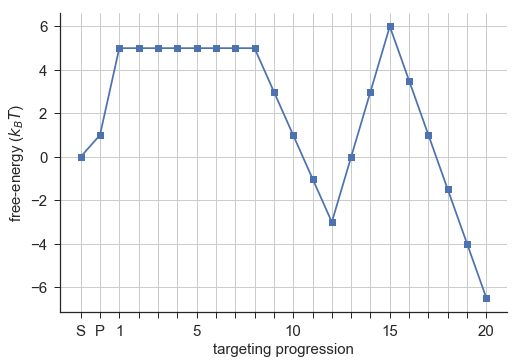

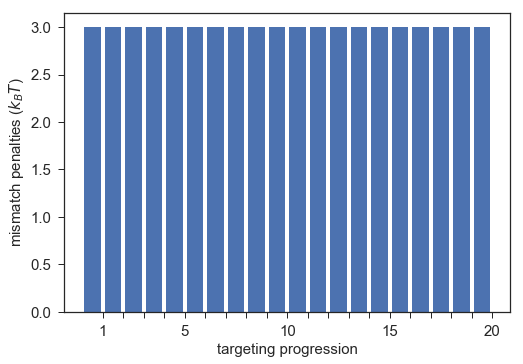

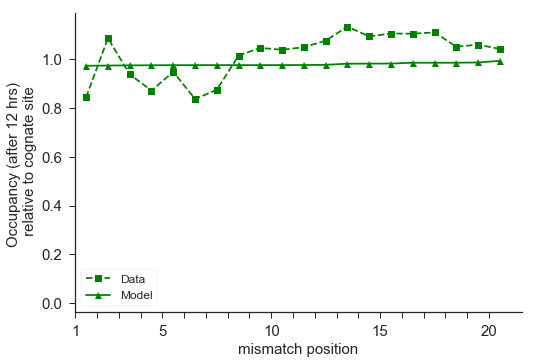

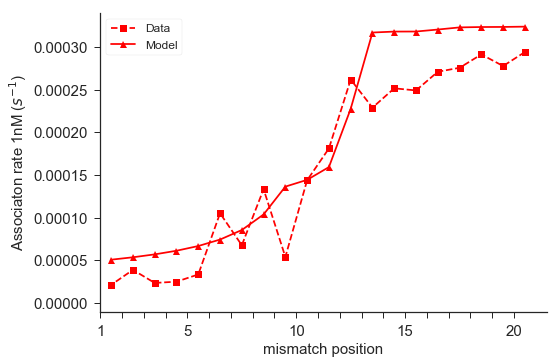

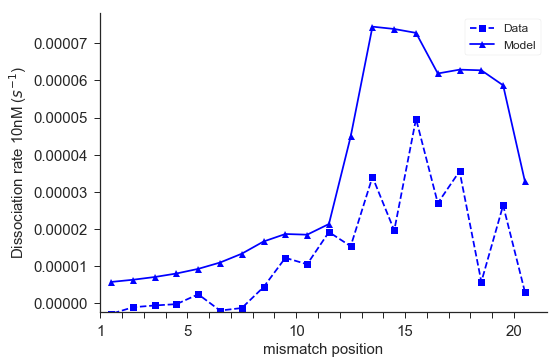

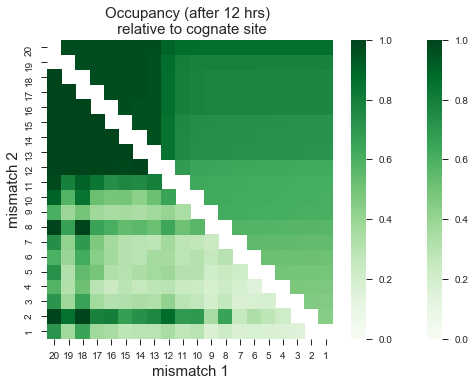

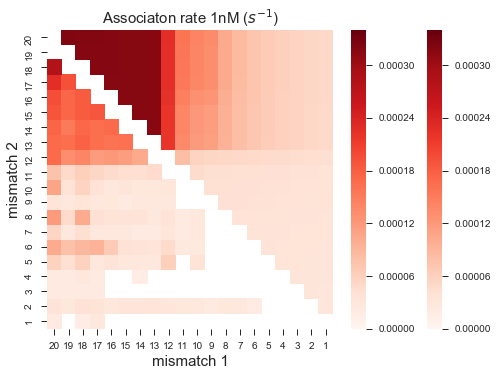

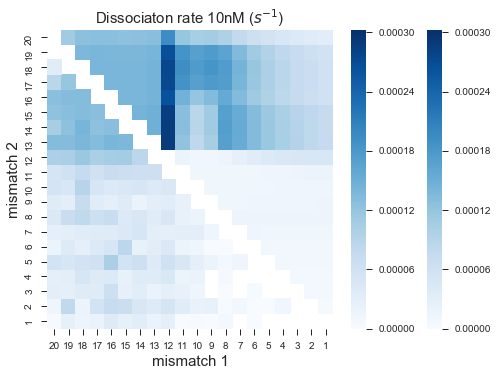

In [66]:
reload(plt_B)

model_id = 'init_limit_5EpsC_2EpsI'

e_PAM = 1.0
ec_1 = -4.0
ec_2 = 0.0
ec_3 = 2
ec_4 = -3.0
ec_5 = 2.5
eI_1 = 3.0
eI_2 = 3.0
bp2 = 8
bp3 = 12
bp4 = 15
bpI = 10
k_PAM = 1000.0
E_barr = -ec_1
k = 6

parameters = [e_PAM, ec_1, ec_2, ec_3, ec_4, ec_5, eI_1, eI_2, bp2, bp3, bp4, bpI, k_PAM,E_barr, k]

Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)

plt_B.plot_landscape(parameters, model_id)
plt.figure()
plt_B.plot_mismatch_penalties(parameters, model_id)

plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

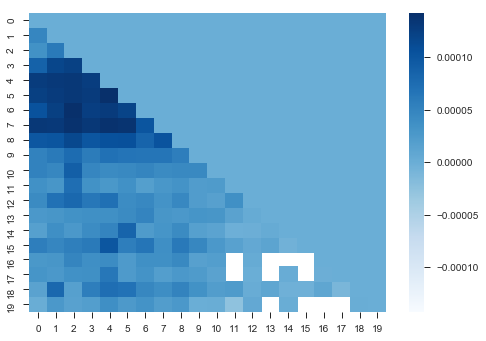

In [65]:
Path_to_boyle = '../Data_Boyle/KoenDataForMisha/BoyleData/'
data_file_off = 'DataOffRate.txt'
off_data = np.loadtxt(delimiter=',', fname=Path_to_boyle + data_file_off)


sns.heatmap(np.tril(off_data,k=-1), cmap='Blues')

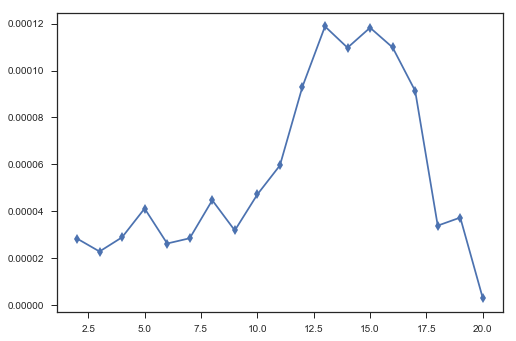

In [51]:
A = np.tril(off_data,k=-1)

avg_off_rate = [] 
for i in range(len(off_data)-1):
    avg = 0
    nan_count =0
    for j in range(0,i+1):
        if np.isnan(off_data[i,j])==False:
            avg += off_data[i,j]
        else:
            nan_count +=1
    avg /= ( len(range(0,i+1)) - nan_count)
    avg_off_rate.append(avg)

    
x = np.arange(20,1,-1)
plt.plot(x,(avg_off_rate), marker='d')


## Fit T (constant epsilon I)

In [76]:
model_id = 'constant_eps_I'
filename = '../data/26_7_2018/fit_26_7_2018_sim_T.txt'
Nparams = 24
parameters = plt_B.load_simm_anneal(filename, Nparams)


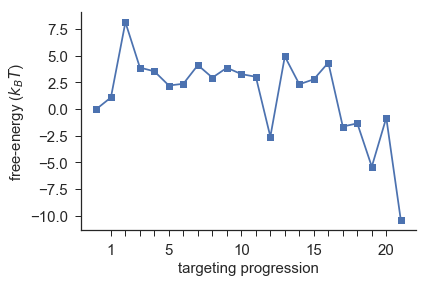

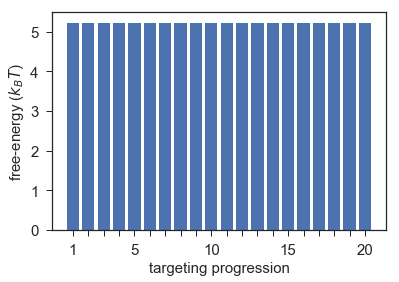

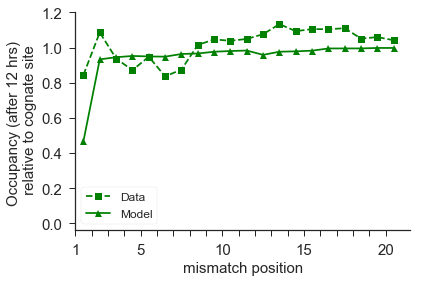

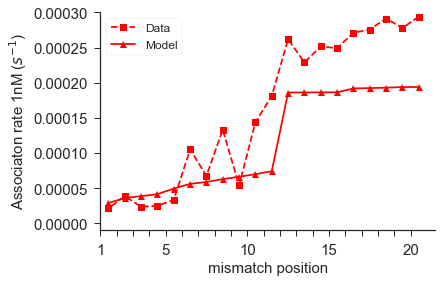

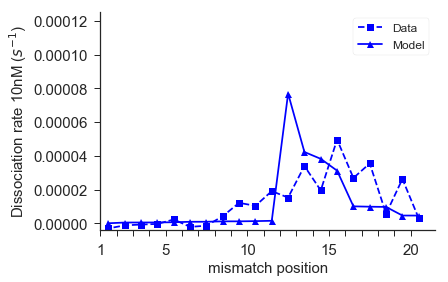

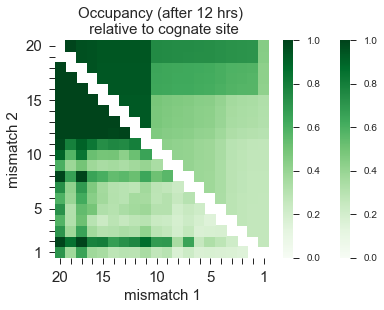

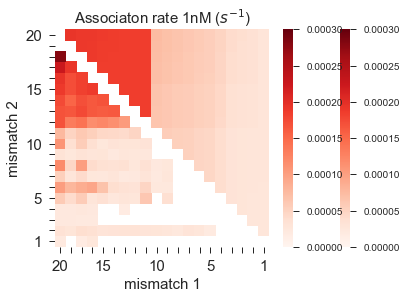

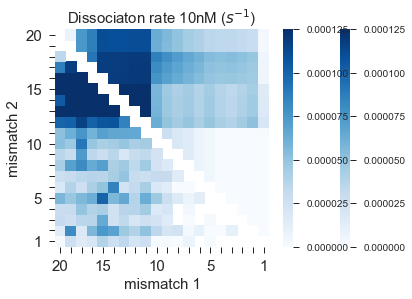

In [81]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)

plt_B.plot_landscape(parameters, model_id)
plt.figure()
plt_B.plot_mismatch_penalties(parameters, model_id)

plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

## Fit Q (constant epsilon I)

In [82]:
model_id = 'constant_eps_I'
filename = '../data/26_7_2018/fit_26_7_2018_sim_Q.txt'
Nparams = 24
parameters = plt_B.load_simm_anneal(filename, Nparams)


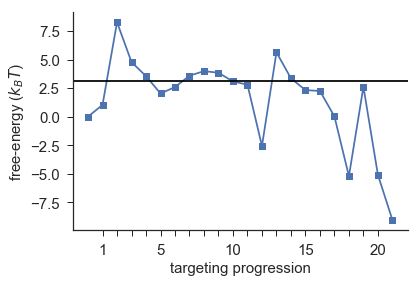

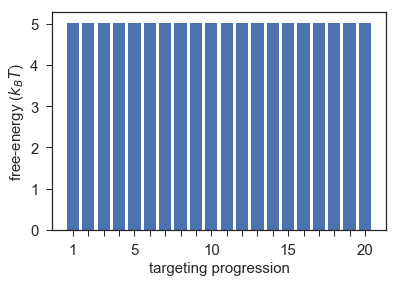

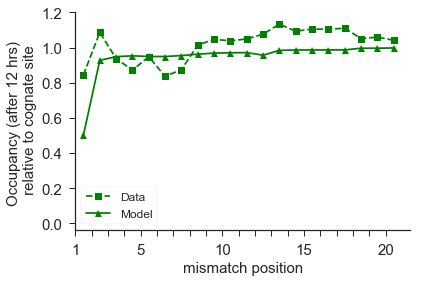

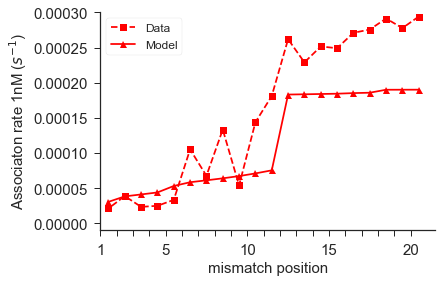

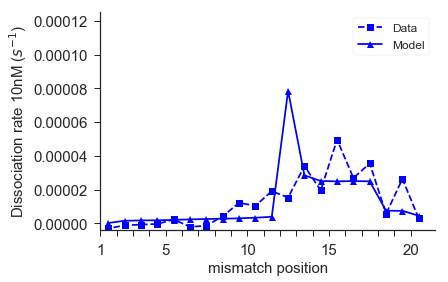

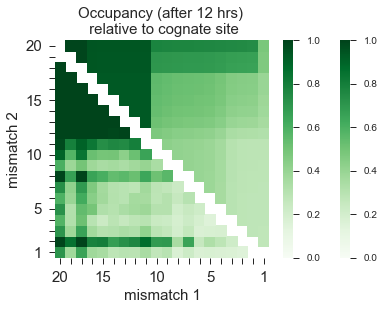

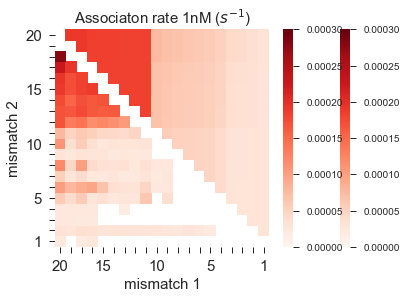

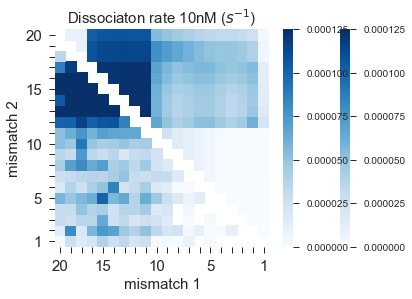

In [94]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)

landscape = plt_B.plot_landscape(parameters, model_id)
plt.axhline(3.076037024045001, color='black')
plt.figure()
plt_B.plot_mismatch_penalties(parameters, model_id)

plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

## Trying Model with two slopes in the on-target landscape (constant E_I)

-5.9999999999999991

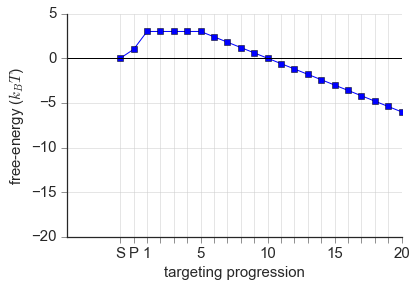

In [35]:
model_id='init_limit_lock_const_EpsI'

e_PAM = 1
ec_1 = -2
ec_first = 0.0
ec_second = 0.6
e_I = 4
x = 5 
k_PAM = 100.0
E_barr = -ec_1
k = 0.4

parameters = [e_PAM, ec_1, ec_first, ec_second, e_I, x, k_PAM, E_barr, k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

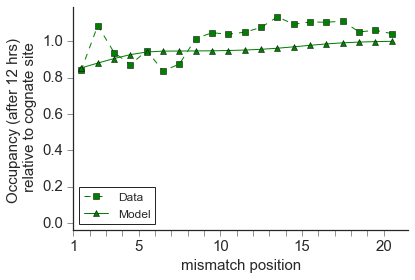

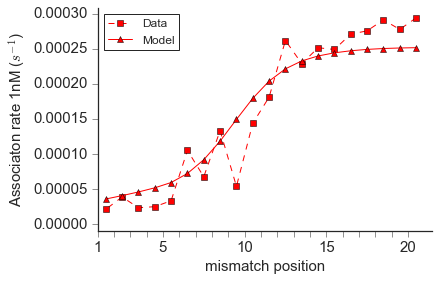

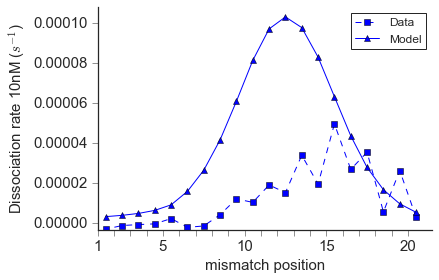

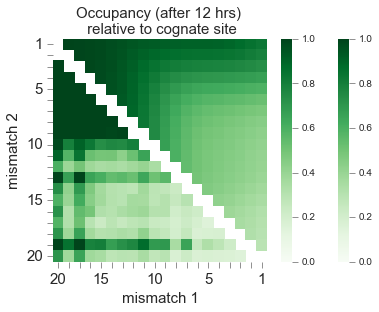

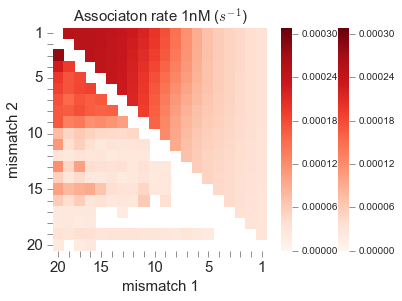

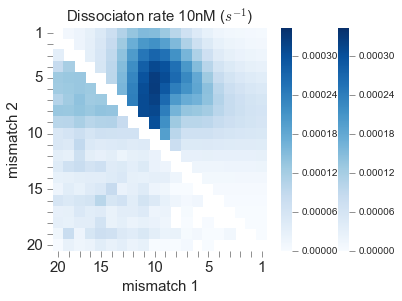

In [36]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

-5.0

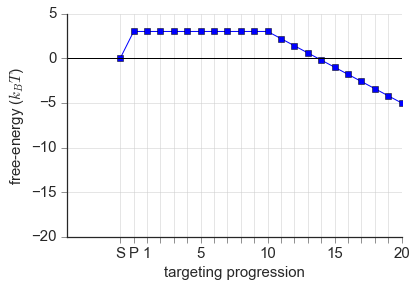

In [40]:
model_id='init_limit_lock_const_EpsI'

e_PAM = 3
ec_1 = 0
ec_first = 0.0
ec_second = 0.8
e_I = 1.5
x = 10
k_PAM = 100.0
E_barr = -ec_1
k = 0.6

parameters = [e_PAM, ec_1, ec_first, ec_second, e_I, x, k_PAM, E_barr, k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

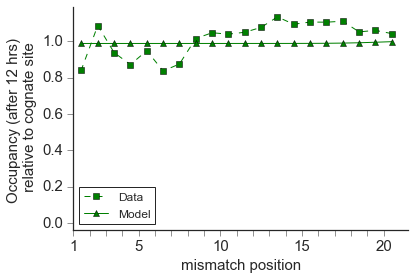

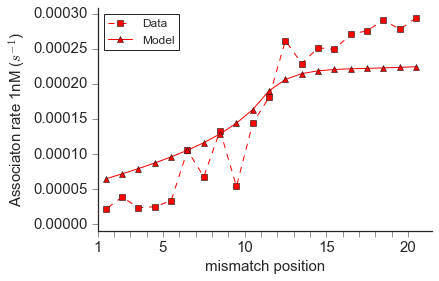

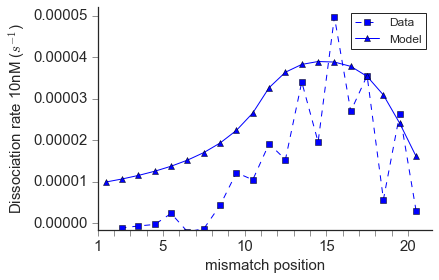

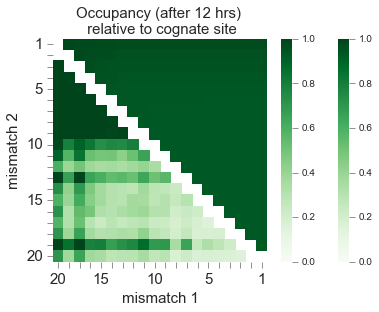

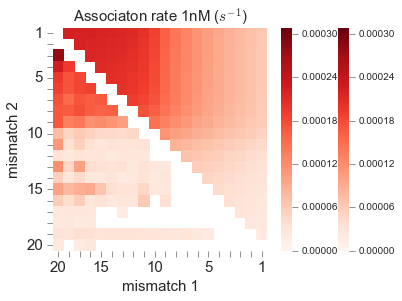

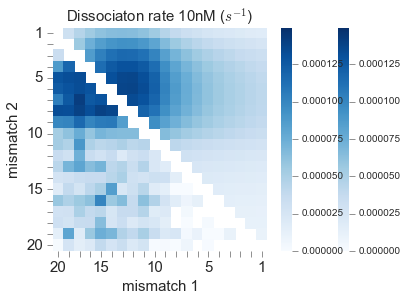

In [41]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

## Trying Model with two drops in the on-target landscape (constant E_I)

-6.5

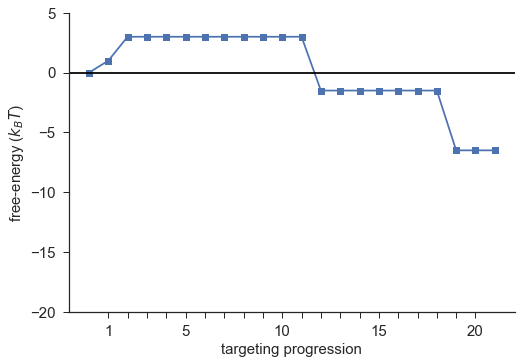

In [124]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_two_drops'

e_PAM = 1.0
ec_1 = -2.0
ec_first = 0.0
drop1 = 4.5
ec_second = 0.0
drop2 = 5.0
ec_third = 0.0
pos1 = 10
pos2 = 17
e_I = 4
k_PAM = 100.0
E_barr = -ec_1
k = 1.0

parameters = [e_PAM,ec_1,ec_first,drop1,ec_second,drop2,ec_third,pos1,pos2,e_I,k_PAM,E_barr,k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

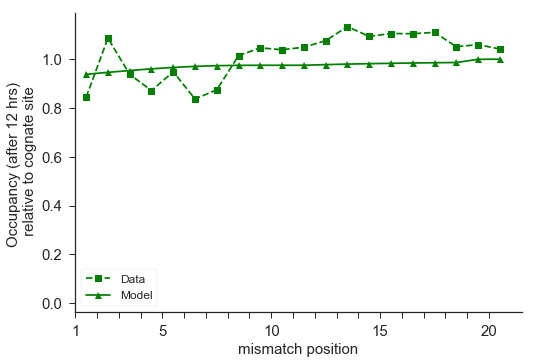

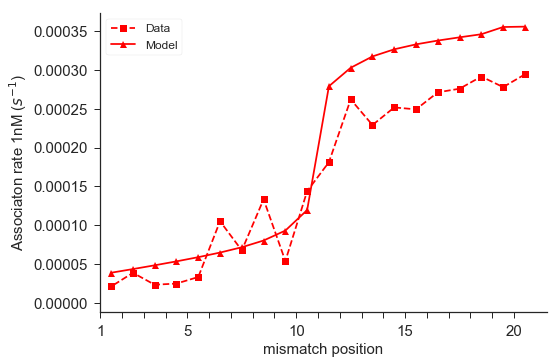

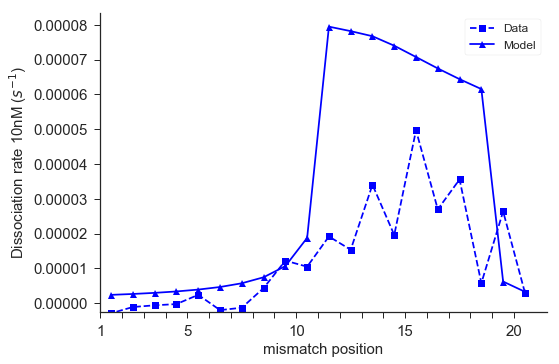

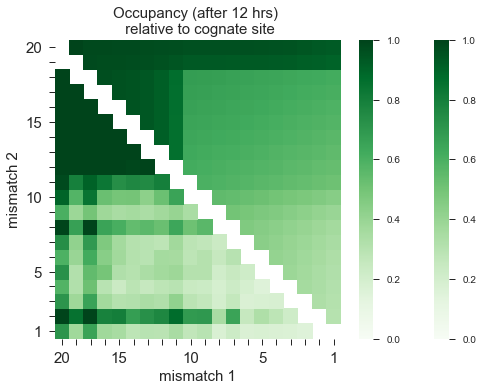

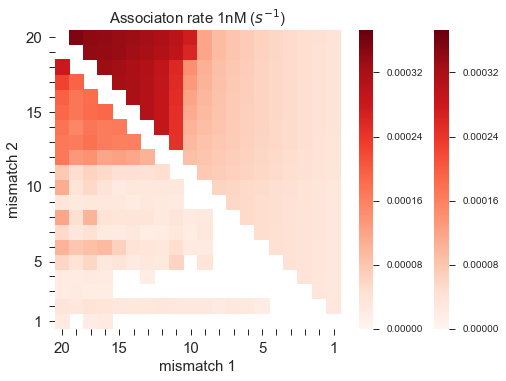

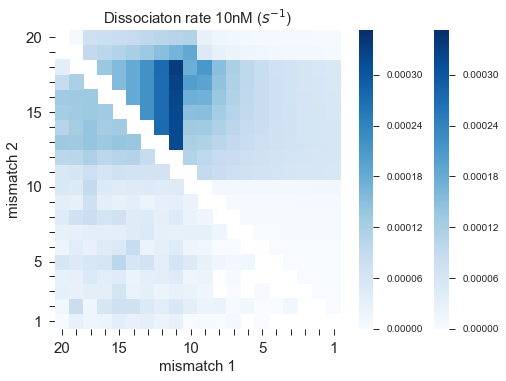

In [125]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

## Important

-6.9500000000000002

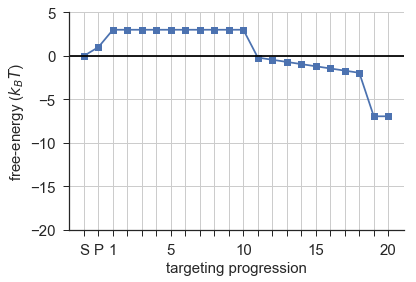

In [219]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_two_drops'

e_PAM = 1.0
ec_1 = -2.0
ec_first = 0.0
drop1 = 3.2
ec_second = 0.25
drop2 = 5
ec_third = 0.0
pos1 = 10
pos2 = 18
e_I = 4
k_PAM = 100.0
E_barr = -ec_1
k = 0.6

parameters = [e_PAM,ec_1,ec_first,drop1,ec_second,drop2,ec_third,pos1,pos2,e_I,k_PAM,E_barr,k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

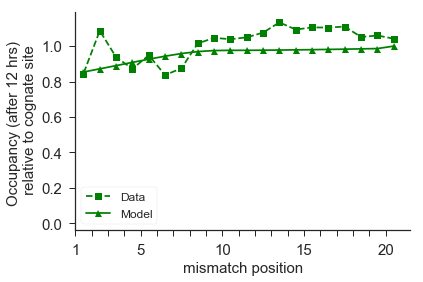

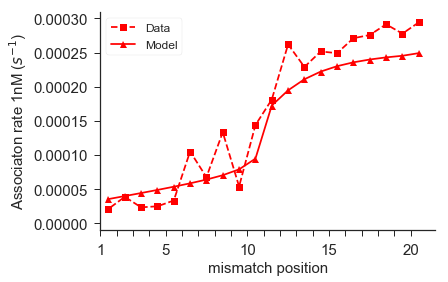

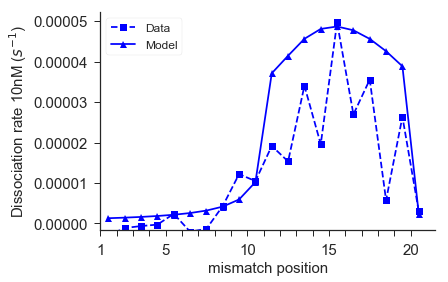

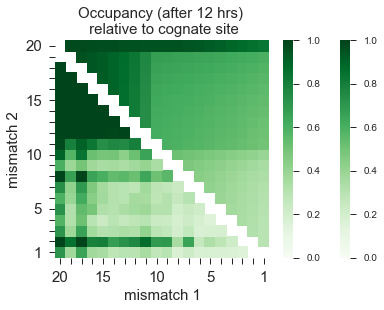

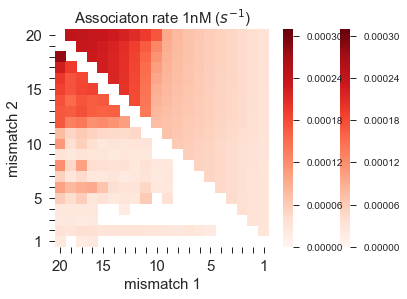

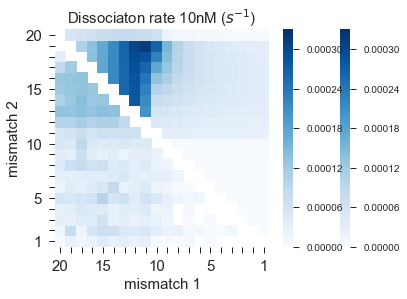

In [220]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

## Important

-6.9500000000000002

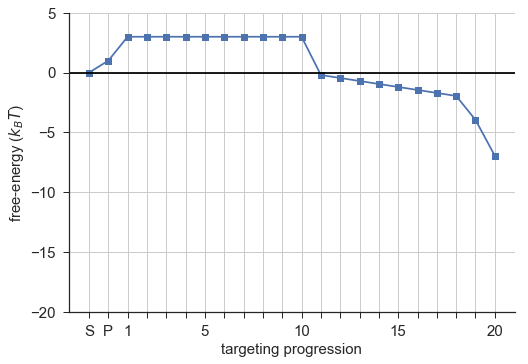

In [203]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_two_drops'

e_PAM = 1.0
ec_1 = -2.0
ec_first = 0.0
drop1 = 3.2
ec_second = 0.25
drop2 = 2
ec_third = 3
pos1 = 10
pos2 = 18
e_I = 4
k_PAM = 100.0
E_barr = -ec_1
k = 0.6

parameters = [e_PAM,ec_1,ec_first,drop1,ec_second,drop2,ec_third,pos1,pos2,e_I,k_PAM,E_barr,k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

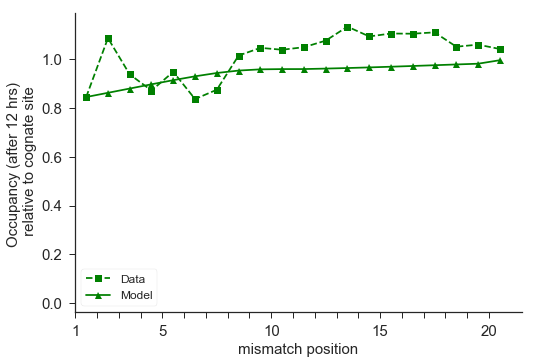

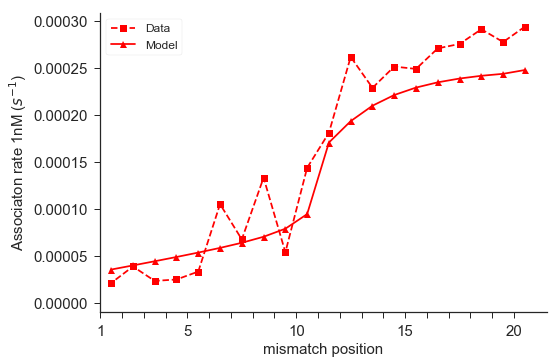

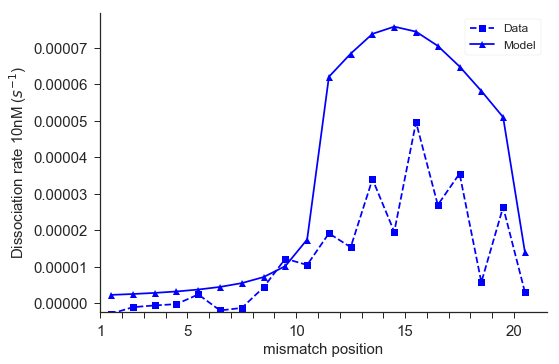

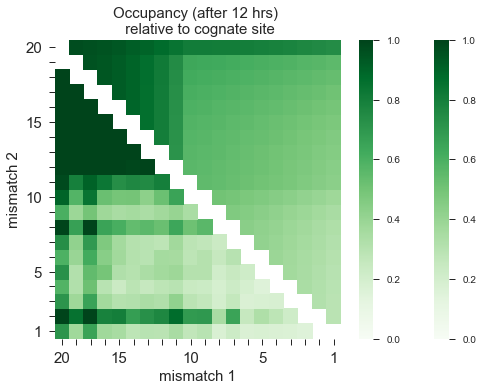

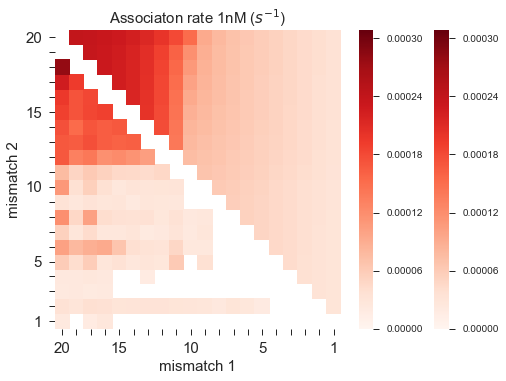

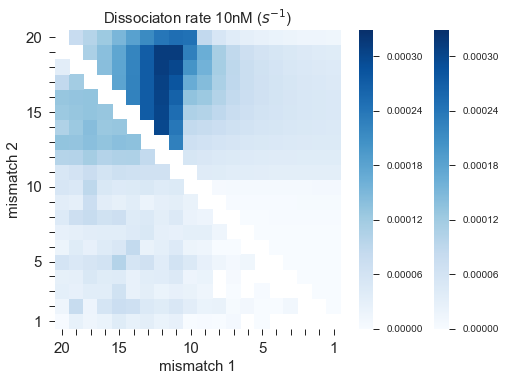

In [202]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

-6.5000000000000009

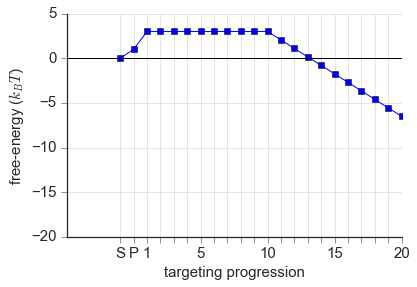

In [119]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_two_drops'

e_PAM = 1.0
ec_1 = -2.0
ec_first = 0.0
drop1 = ec_second
ec_second = 0.95
drop2 = ec_second
ec_third = ec_second
pos1 = 9
pos2 = 18
e_I = 4.2
k_PAM = 100.0
E_barr = -ec_1
k = 0.6

parameters = [e_PAM,ec_1,ec_first,drop1,ec_second,drop2,ec_third,pos1,pos2,e_I,k_PAM,E_barr,k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

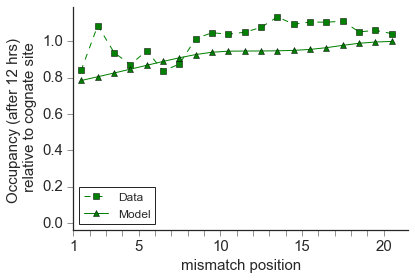

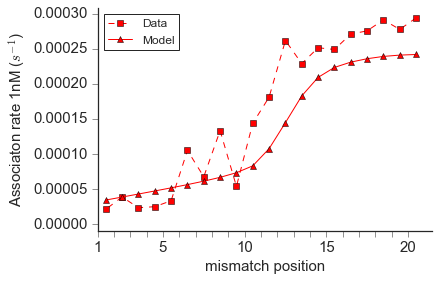

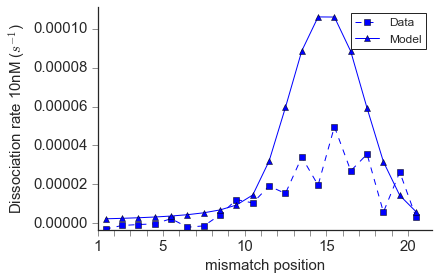

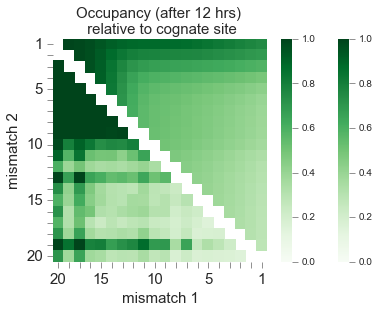

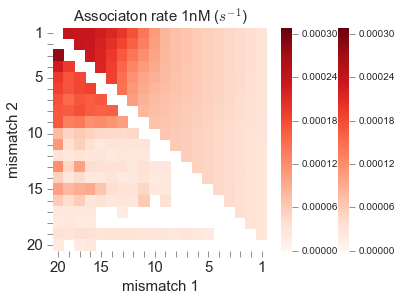

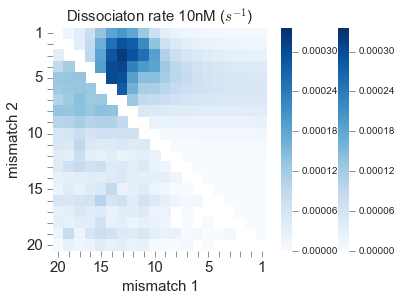

In [120]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')

-3.0

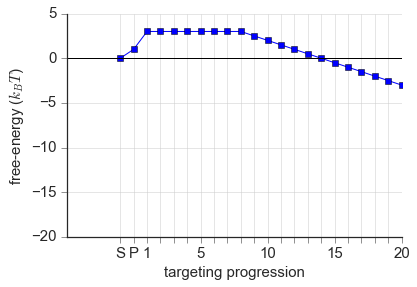

In [123]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_two_drops'

e_PAM = 1.0
ec_1 = -2.0
ec_first = 0.0
drop1 = ec_second
ec_second = 0.5
drop2 = ec_second
ec_third = ec_second
pos1 = 8
pos2 = 18
e_I = 2
k_PAM = 100.0
E_barr = -ec_1
k = 0.6

parameters = [e_PAM,ec_1,ec_first,drop1,ec_second,drop2,ec_third,pos1,pos2,e_I,k_PAM,E_barr,k]

Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id=model_id);
plt.ylim([-20, 5]);
Energy_landscape[-1]
plt.axhline(0, color='k')
Energy_landscape[-1]

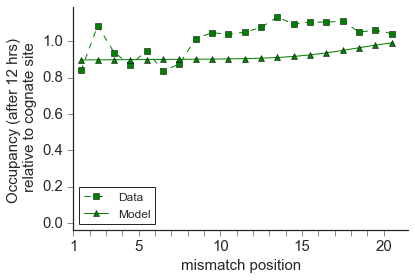

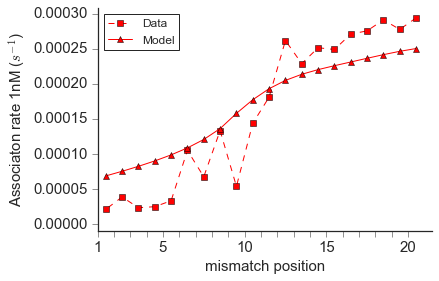

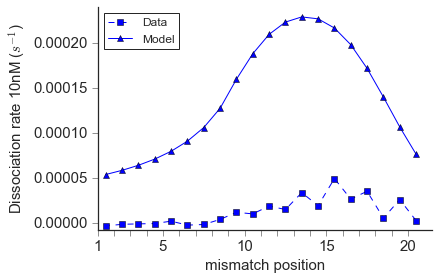

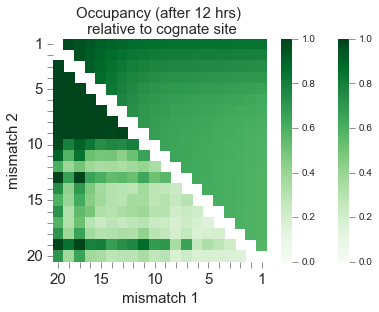

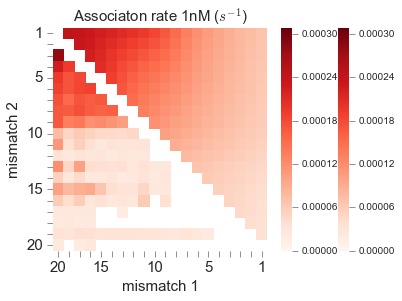

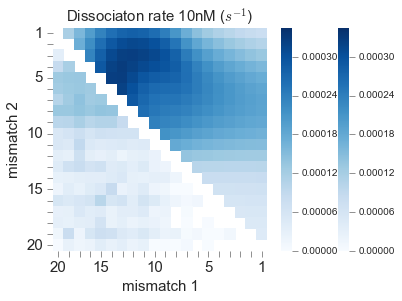

In [124]:
reload(plt_B)
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)
plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')